In [1]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/AriesRmd/Temu-Kembali-Citra/master/Data/K_H.zip \
    -O /content/K_H.zip

--2021-12-06 11:35:04--  https://raw.githubusercontent.com/AriesRmd/Temu-Kembali-Citra/master/Data/K_H.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7698546 (7.3M) [application/zip]
Saving to: ‘/content/K_H.zip’

/content/K_H.zip    100%[===================>]   7.34M  --.-KB/s    in 0.09s   

2021-12-06 11:35:04 (82.7 MB/s) - ‘/content/K_H.zip’ saved [7698546/7698546]



In [2]:
!unzip \*.zip &> /dev/null && rm *.zip

In [48]:
!rm -rf /content/model

In [3]:
import os
os.mkdir('/content/model_images')
os.mkdir('/content/model_images/train')
os.mkdir('/content/model_images/valid')

In [4]:

os.mkdir('/content/model_images/train/horse')
os.mkdir('/content/model_images/valid/elephant')

os.mkdir('/content/model_images/train/elephant')
os.mkdir('/content/model_images/valid/horse')

In [5]:
import os
import shutil

#Splitting Horse
images_original = "/content/horse"
images_train = "/content/model_images/train/horse"
images_validation = "/content/model_images/valid/horse"

files = os.listdir(images_original)
# memindahkan 80% file
for file in files[0:int(len(files) * .8)]:
  new_path = shutil.move(f"{images_original}/{file}", images_train)

#=========================================================
files2 = os.listdir(images_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{images_original}/{file}", images_validation)

In [6]:
import os
import shutil

#Splitting Elephant
images_original = "/content/elephant"
images_train = "/content/model_images/train/elephant"
images_validation = "/content/model_images/valid/elephant"

files = os.listdir(images_original)
# memindahkan 80% file
for file in files[0:int(len(files) * .8)]:
  new_path = shutil.move(f"{images_original}/{file}", images_train)

#=========================================================
files2 = os.listdir(images_original)

# memmindahkan sisa(seluruh file)
for file in files2:
    new_path = shutil.move(f"{images_original}/{file}", images_validation)

In [7]:
dtest_horse = "/content/model_images/valid/horse"
dtrain_horse = "/content/model_images/train/horse"

dtest_elephant = "/content/model_images/valid/elephant"
dtrain_elephant = "/content/model_images/train/elephant"

file_train_h = os.listdir(dtrain_horse)
file_test_h = os.listdir(dtest_horse)

file_train_e = os.listdir(dtrain_elephant)
file_test_e = os.listdir(dtest_elephant)

#=================================================

# print(file_train[0:int(len(file_train) * .001)])
print("data Horse train : " + str(len(file_train_h)))
print("data Horse validation : " + str(len(file_test_h)))
print("data Elephant train : " + str(len(file_train_e)))
print("data Elephant validation : " + str(len(file_test_e)))

data Horse train : 80
data Horse validation : 20
data Elephant train : 80
data Elephant validation : 20


In [8]:
import os
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []

train_dir=os.path.join('/content/model_images/train')
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [9]:
# Gather data validation
val_data = []
val_label = []

vali_dir=os.path.join('/content/model_images/valid')
for r, d, f in os.walk(vali_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (250,250))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [10]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (160, 250, 250, 3)
Train Label =  (160,)
Validation Data =  (40, 250, 250, 3)
Validation Label =  (40,)


In [11]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [203 172 121]
Data setelah di-normalisasi  [0.79607844 0.6745098  0.4745098 ]


In [12]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di-encoder ", train_label[:10])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[:])

Label sebelum di-encoder  ['elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
from keras import backend as K
from keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
from tensorflow.keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,AveragePooling2D

# from keras.applications import ResNet50,MobileNet, DenseNet201, InceptionV3, NASNetLarge, InceptionResNetV2, NASNetMobile
import gc
#build cnn
def build_model(backbone, learning_rate=1e-4):
    model = Sequential()
    model.add(backbone)
    model.add(Conv2D(16, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    model.add(Conv2D(32, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding="same"))
    # model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    # model.add(layers.Dense(1, activation='softmax'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    

    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    
    return model

K.clear_session()
gc.collect()

resnet = DenseNet201(
    weights='imagenet',
    include_top=False,
    input_shape=(250,250,3)
)

model = build_model(resnet ,learning_rate = 1e-4)
model.summary()

74850304/74836368 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 16)          276496    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 5, 5, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                         

In [14]:
#early stop  to avoid overfitting
import tensorflow as tf
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
        zoom_range=2,  # set range for random zoom
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
)
BATCH_SIZE = 20

In [16]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
8/8 [==============================] - 52s 2s/step - loss: 0.6616 - accuracy: 0.6062 - val_loss: 0.5646 - val_accuracy: 0.7000
Epoch 2/50
8/8 [==============================] - 8s 1s/step - loss: 0.5238 - accuracy: 0.7375 - val_loss: 0.3965 - val_accuracy: 0.8000
Epoch 3/50
8/8 [==============================] - 8s 1s/step - loss: 0.4590 - accuracy: 0.8313 - val_loss: 0.3339 - val_accuracy: 0.8000
Epoch 4/50
8/8 [==============================] - 8s 1s/step - loss: 0.3770 - accuracy: 0.9000 - val_loss: 0.2473 - val_accuracy: 0.9250
Epoch 5/50
8/8 [==============================] - 8s 1s/step - loss: 0.3402 - accuracy: 0.9312 - val_loss: 0.1676 - val_accuracy: 0.9750
Epoch 6/50
8/8 [==============================] - 8s 1s/step - loss: 0.2852 - accuracy: 0.9812 - val_loss: 0.1263 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 8s 1s/step - loss: 0.2414 - accuracy: 0.9937 - val_loss: 0.1037 - val_accuracy: 1.0000
Epoch 8/50
8/8 [========================

In [17]:
import matplotlib.pyplot as plt
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])
  # plt.savefig("/content/Model/AccLostPlotAlexnetModel90.svg")

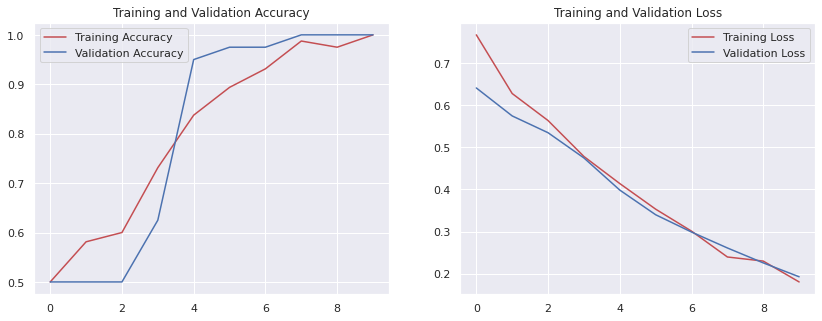

In [82]:
eval_plot(H)

In [18]:
import PIL

def predictModel(image_path):
    img = PIL.Image.open(image_path)
    img_resized = img.resize((250, 250), PIL.Image.LANCZOS)
    plt.imshow(img_resized)
    plt.axis('off')
    plt.title("First")
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    predik = H.predict(img_array)

    labels = np.argmax(predik, axis=1)
    if labels == 0 :
      plt.title(f"Pred : {predik}\nLabels : {labels}Elephant")
    elif labels == 1 :
      plt.title(f"Pred : {predik}\nLabels : {labels}Horse")



[0]
h


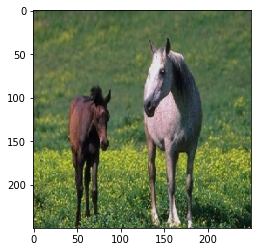

In [21]:
from keras.preprocessing import image
#test model 1
img_ = image.load_img("/content/model_images/valid/horse/707.jpg", target_size=(250, 250))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print(pred)
print(label[pred[0]])
plt.imshow(img_)

Model 2

In [22]:
# TULIS KODE ANDA DISINI
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import tensorflow as tf

# Feature Extraction Layer
# Alexnet = Sequential()

inputs = tf.keras.Input(shape = (250, 250, 3))
x = tf.keras.layers.Conv2D(filters = 96, kernel_size = (11, 11), strides = (4, 4), padding = 'valid')(inputs)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 256, kernel_size = (11, 11), strides = (1, 1), padding = 'valid')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2),  padding = 'valid')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.Conv2D(filters = 384, kernel_size = (3, 3), strides = (1, 1), padding = 'valid')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.Conv2D(filters = 256, kernel_size = (3, 3), strides = (1, 1), padding = 'valid')(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid')(x)
x = tf.keras.layers.BatchNormalization()(x) 
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, input_shape = (224*224*3, ))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(4096)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128)(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)


Alexnet = tf.keras.Model(inputs = inputs, outputs = outputs)

print(Alexnet.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 96)        34944     
                                                                 
 activation (Activation)     (None, 60, 60, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 256)       297395

In [23]:
Alexnet.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [25]:
history = Alexnet.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=20,
    epochs = 50,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=40,
            verbose=1,
            mode='auto',
            cooldown=1
        )
    ]
)

Epoch 1/50
8/8 [==============================] - 1s 92ms/step - loss: 0.6596 - accuracy: 0.9000 - val_loss: 171.7713 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 2/50
8/8 [==============================] - 1s 93ms/step - loss: 0.3432 - accuracy: 0.9500 - val_loss: 58.1408 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/50
8/8 [==============================] - 1s 93ms/step - loss: 0.1103 - accuracy: 0.9688 - val_loss: 34.0563 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/50
8/8 [==============================] - 1s 95ms/step - loss: 0.9688 - accuracy: 0.9375 - val_loss: 97.1759 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 5/50
8/8 [==============================] - 1s 94ms/step - loss: 0.5461 - accuracy: 0.9250 - val_loss: 95.5721 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/50
8/8 [==============================] - 1s 94ms/step - loss: 0.6117 - accuracy: 0.9375 - val_loss: 40.0028 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/50
8/8 [==============================] - 1s 93ms/step - loss: 0.3816 - a

In [26]:
import matplotlib.pyplot as plt
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])
  # plt.savefig("/content/Model/AccLostPlotAlexnetModel90.svg")

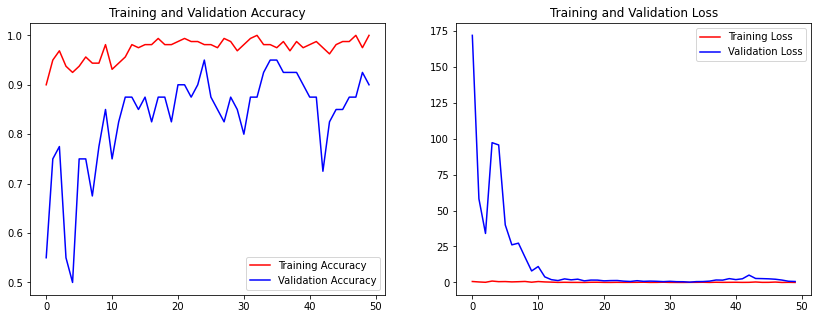

In [27]:
eval_plot(history)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

def evaluate(Alexnet):

  valid_generator = train_generator.flow_from_directory(
          train_dir, 
          target_size=(250,250), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False)

  batch_size = 32
  num_of_test_samples = len(valid_generator.filenames)

  Y_pred = Alexnet.predict_generator(valid_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  cm = confusion_matrix(valid_generator.classes, y_pred)
  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
  plt.xticks(ticks=[0.5, 1.5], labels=['elephant', 'horse'])
  plt.yticks(ticks=[0.5, 1.5], labels=['elephant', 'horse'])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

  print('\n\nClassification Report\n')
  target_names = ['elephant', 'horse']
  print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
 print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

In [32]:
import PIL

def predictModel(image_path):
    img = PIL.Image.open(image_path)
    img_resized = img.resize((250, 250), PIL.Image.LANCZOS)
    plt.imshow(img_resized)
    plt.axis('off')
    plt.title("First")
    img_array = np.expand_dims(np.array(img_resized), axis=0)

    predik = Alexnet.predict(img_array)

    labels = np.argmax(predik, axis=1)
    if labels == 0 :
      plt.title(f"Pred : {predik}\nLabels : {labels}elephant")
    elif labels == 1 :
      plt.title(f"Pred : {predik}\nLabels : {labels}horse")

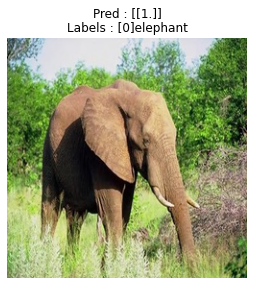

In [33]:
import cv2
from matplotlib import pyplot as plt
  
fig = plt.figure(figsize=(25, 15))
  
rows = 3
columns = 5
  
fig.add_subplot(rows, columns, 1)
predictModel("/content/model_images/train/elephant/501.jpg")

In [ ]:
==================================

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# serialize Alexnet model to JSON
Alexnet_model_json = Alexnet.to_json()
with open("model.json", "w") as json_file: json_file.write(Alexnet_model_json)
# serialize weights to HDF5
Alexnet.save_weights("/content/Model/AlexnetModel90.h5")
print("Saved model to disk")

In [37]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [38]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/h5/model1.h5') 

In [39]:
Alexnet.save('saved_model/h5/alex.h5') 